In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.feature import blob_log
from skimage.filters import gaussian
from skimage.data import cells3d
from skimage import filters
import glob
from microfilm.microplot import microshow
import stackview
import scipy as sp

(1000, 1000)


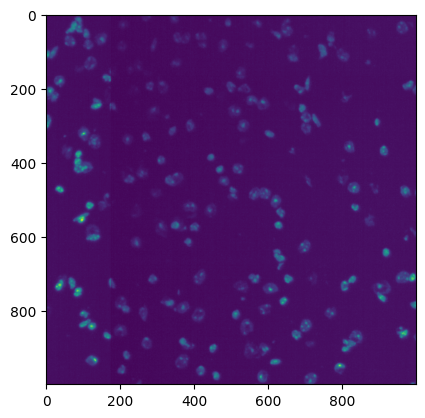

In [2]:
image = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_DAPI.tif")
#image.mean()
print(image.shape)
plt.imshow(image)

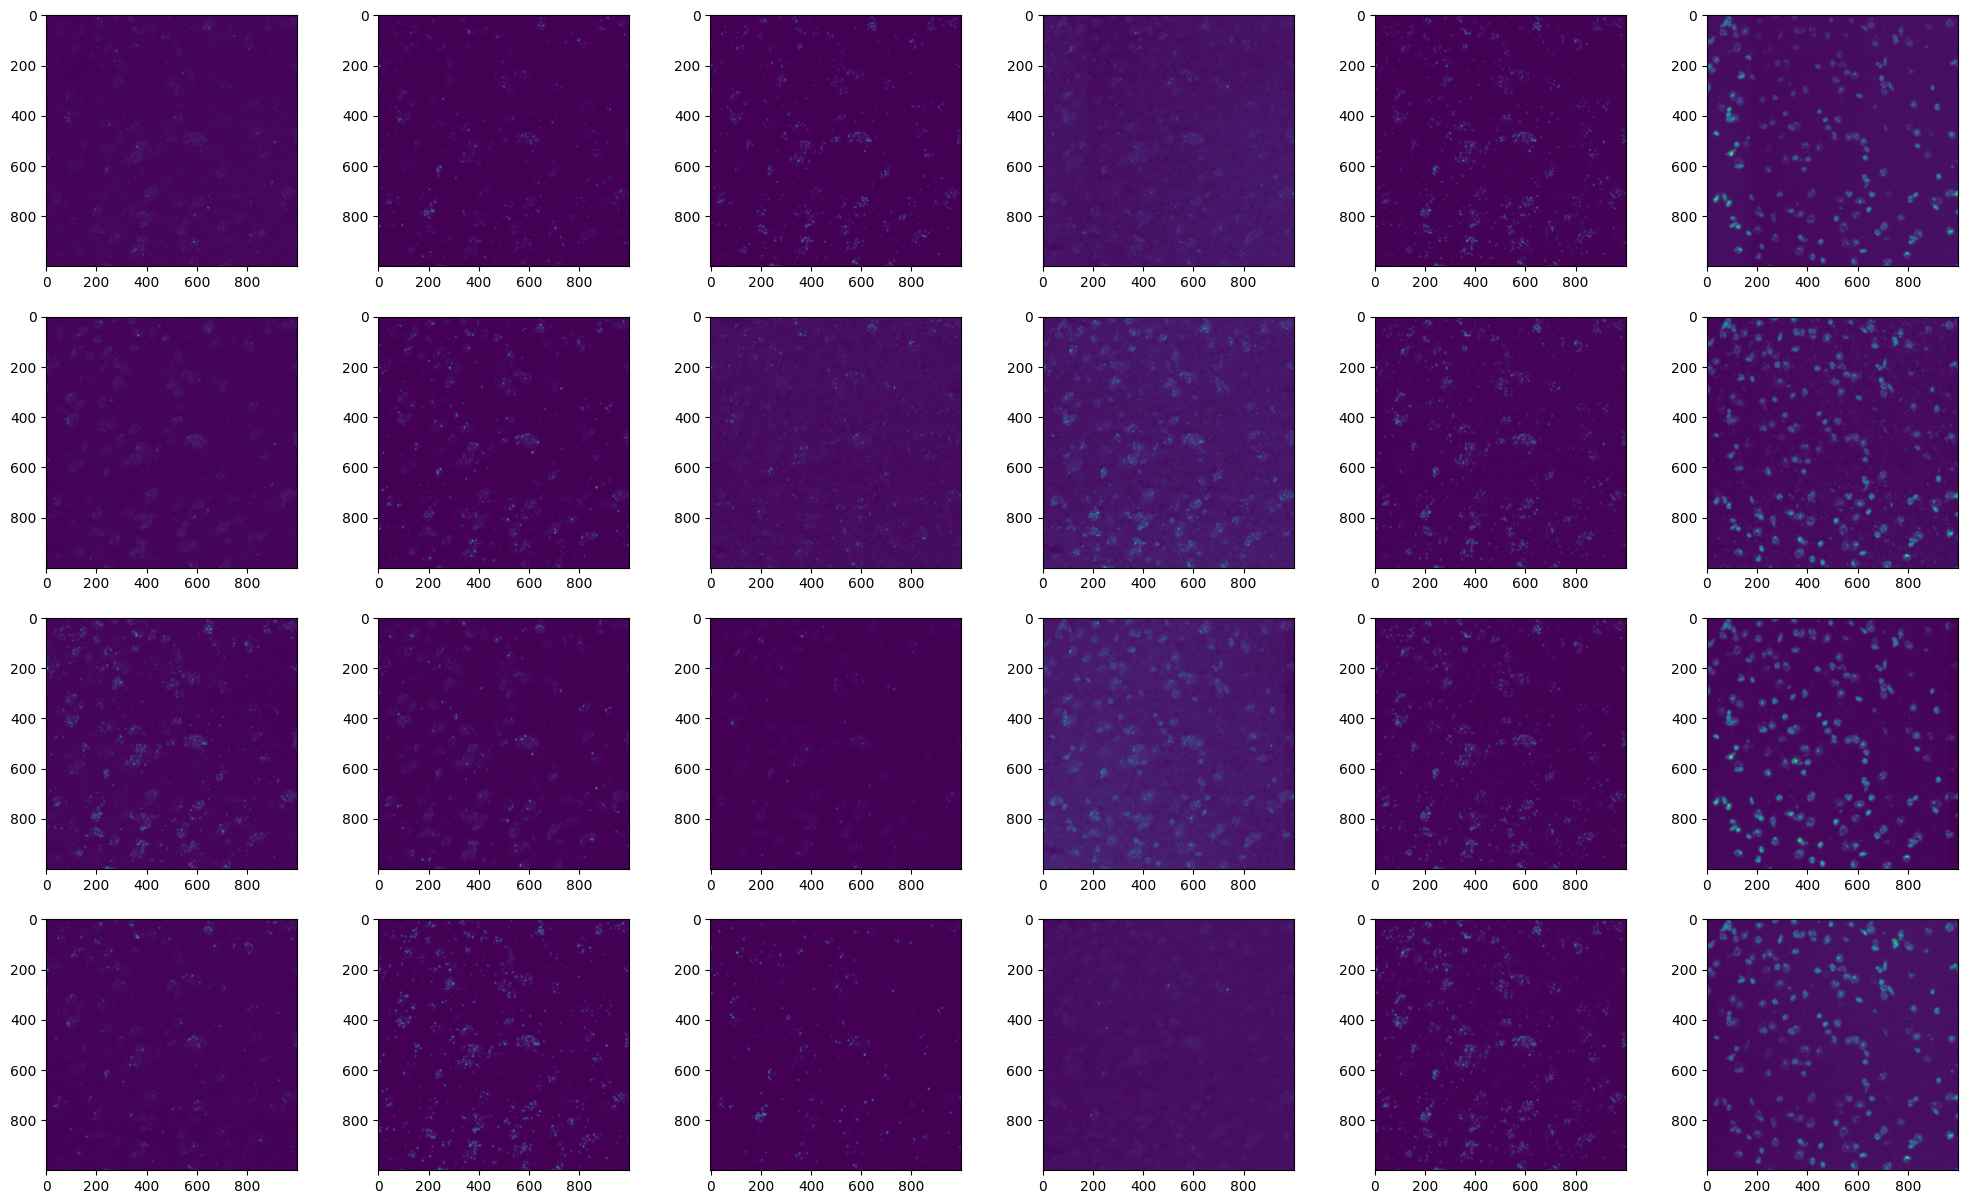

In [3]:
file_select = glob.glob(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_*.tif")
file_list = []
for file in file_select:
    file_list.append(ski.io.imread(file))

fig, axs = plt.subplots(4, 6, figsize=(25, 15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(file_list[i])
plt.show()

c:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\.venv\Lib\site-packages\napari_tools_menu\__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
c:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\.venv\Lib\site-packages\napari_skimage_regionprops\_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


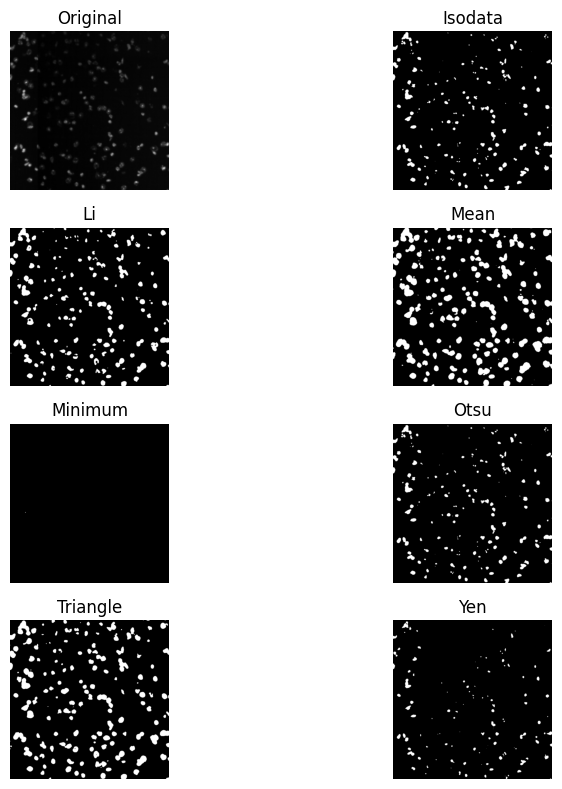

In [4]:
#test
from skimage.io import imread
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle

from skimage.filters import try_all_threshold
from skimage.filters import gaussian, laplace
from matplotlib import pyplot as plt
import napari_simpleitk_image_processing as nsitk

image_denoised = gaussian(image, sigma=2, preserve_range=True)
image_denoised2 = laplace(image_denoised)
fig, ax = try_all_threshold(image_denoised, figsize=(10, 8), verbose=False)
plt.show()

cl.OCLArray([[0.98819494, 1.0052495 , 1.0222911 , ..., 1.0298604 , 0.99844456,
        0.99964774],
       [1.0049248 , 1.0219824 , 1.0132656 , ..., 0.97325164, 1.0482036 ,
        1.0084752 ],
       [1.0559878 , 1.0129539 , 1.012838  , ..., 1.0065346 , 0.9914479 ,
        0.9352276 ],
       ...,
       [1.012989  , 1.0045694 , 0.99615026, ..., 1.0175835 , 0.93158764,
        0.87115747],
       [0.9705834 , 0.98791635, 0.9794827 , ..., 1.0666951 , 0.9321377 ,
        0.93551606],
       [0.9883131 , 0.98845834, 1.0058011 , ..., 1.1086384 , 0.99466836,
        0.96749157]], shape=(1000, 1000), dtype=float32)
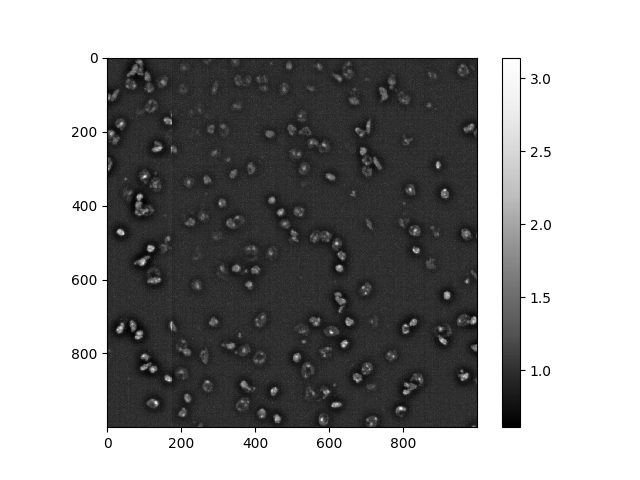
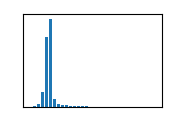

In [5]:
#test
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian

#cle.asarray(image)
intensity_equivalized = cle.divide_by_gaussian_background(image, sigma_x=12, sigma_y=12)
intensity_equivalized

Anzahl gefundener Blobs: 188


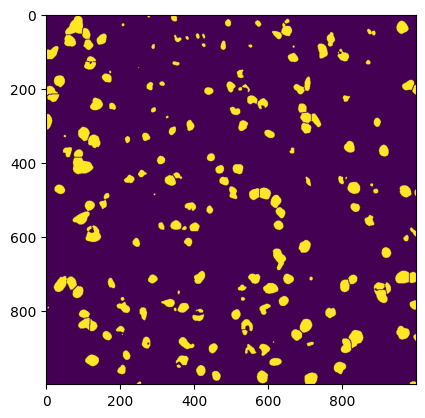

In [6]:
# making a binarized image
from napari_segment_blobs_and_things_with_membranes import threshold_otsu, split_touching_objects
from scipy import ndimage
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import gaussian, laplace

image = ski.io.imread(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_c01_DAPI.tif")

#intensity_equivalized = cle.divide_by_gaussian_background(image, sigma_x=10, sigma_y=10)

image_denoised = gaussian(image, sigma=2, preserve_range=True)
#image_denoised2 = laplace(image)  # optional, for edge detection
image_binary = image_denoised > filters.threshold_li(image_denoised) # is in true and false
#imshow(image_binary)


split_objects = split_touching_objects(image_binary)
plt.imshow(split_objects)


labeled_array, num_features = ndimage.label(split_objects)

print(f"Anzahl gefundener Blobs: {num_features}")


Anzahl gefundener Blobs: 149


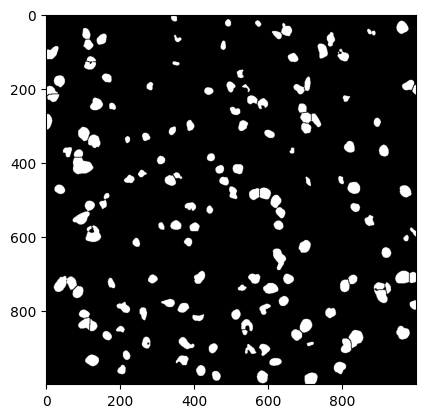

In [7]:
#flitern nach größe
import pyclesperanto_prototype as cle

from skimage.io import imread
import matplotlib
import numpy as np
import stackview

# initialize GPU
#cle.select_device("GTX")
size_min = 150
size_max = 2000

labeled_objects = cle.gauss_otsu_labeling(split_objects, outline_sigma=0)
filtered_labels = cle.exclude_large_labels(cle.exclude_small_labels(labeled_objects, maximum_size=size_min), minimum_size=size_max)
monochrome = (filtered_labels > 0).astype(np.uint8)
plt.imshow(monochrome, cmap='gray')
labeled_array, num_features = ndimage.label(filtered_labels)
print(f"Anzahl gefundener Blobs: {num_features}")


C:\Users\grufl\AppData\Local\Temp\ipykernel_10712\3623933420.py:7: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  disk = morphology.square(10)


Anzahl gefundener Blobs nach Erosion und Dilatation: 149


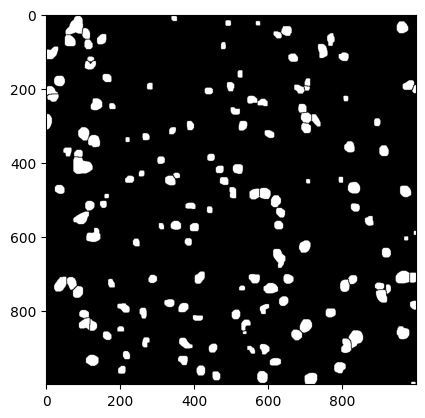

In [8]:
#test
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import filters
disk = morphology.square(10) 

eroded = morphology.binary_erosion(image_binary, disk)
eroded_dilated = morphology.binary_dilation(eroded, disk)
opened = morphology.binary_opening(image_binary, disk)
split_objects = split_touching_objects(opened)
plt.imshow(split_objects, cmap='gray')
labeled_array, num_features = ndimage.label(split_objects)
print(f"Anzahl gefundener Blobs nach Erosion und Dilatation: {num_features}")

Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_1.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_2.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_3.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_4.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_5.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_6.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_7.pdf
Gespeichert: C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images\monochrome_8.pdf
Gespeichert: C:\Users\gr

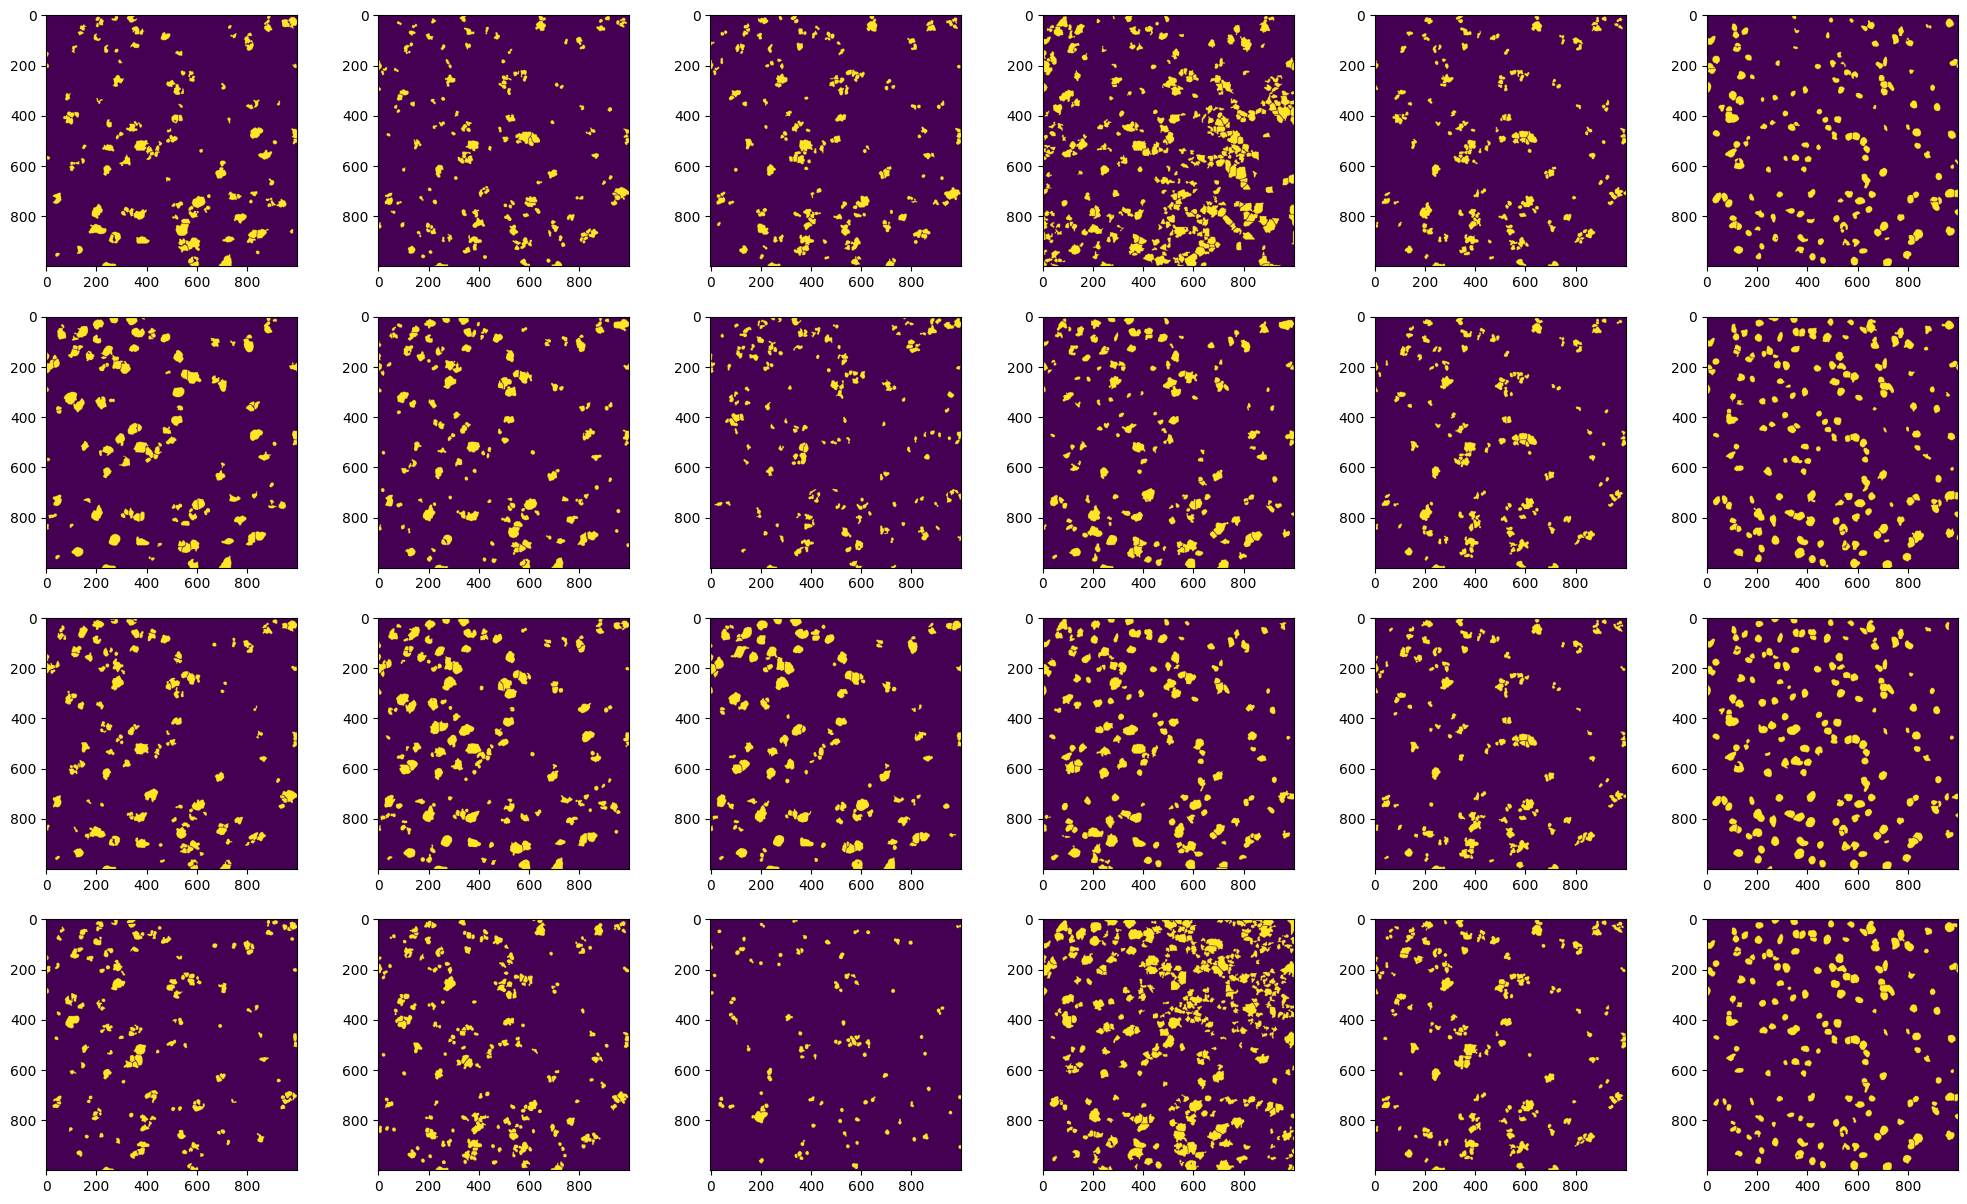

{'file': ['C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_Alexa_488.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_Alexa_568.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_Alexa_647.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_Atto_425.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_Atto_490LS.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung USB\\uni\\Prakt bioinfo\\Bioinfo\\data\\raw\\selected-tiles\\out_opt_flow_registered_X10_Y10_c01_DAPI.tif', 'C:\\Users\\grufl\\Desktop\\211007 Sicherung US

In [ ]:
import skimage as ski
import numpy as np
import pandas as pd
from skimage.filters import gaussian
import glob
import matplotlib.pyplot as plt
from napari_segment_blobs_and_things_with_membranes import split_touching_objects
import os
import pyclesperanto as cle
from PIL import Image
from scipy import ndimage


size_min = 150
size_max = 2000

file_select = glob.glob(r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\raw\selected-tiles\out_opt_flow_registered_X10_Y10_*.tif")
file_list = []
for file in file_select:
    file_list.append(ski.io.imread(file))

binary_list = []
#nuclei_count = []
data = {
    "file": [],
    "nuclei_count": [],
}

for file in file_select:
    data["file"].append(file)
    image = ski.io.imread(file)
    # Apply Gaussian filter to denoise the image
    image_denoised = gaussian(image, sigma=2, preserve_range=True)
    image_binary = image_denoised > filters.threshold_li(image_denoised)
    split_objects = split_touching_objects(image_binary)
    # Convert boolean array to uint8 for cle.gauss_otsu_labeling
    split_objects_uint8 = split_objects.astype(np.uint8)
    labeled_objects = cle.gauss_otsu_labeling(split_objects_uint8, outline_sigma=0)
    filtered_labels = cle.exclude_large_labels(cle.exclude_small_labels(labeled_objects, maximum_size=size_min), minimum_size=size_max)
    labeled_array, num_features = ndimage.label(filtered_labels)
    data["nuclei_count"].append(num_features)
    # Convert filtered labels to monochrome (binary) image
    monochrome = (filtered_labels > 0).astype(np.uint8)
    #nuclei_count.append(num_features)
    binary_list.append(monochrome)

#saving images as PDF
    
# Set your output directory and file name
output_dir = r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed/images"
os.makedirs(output_dir, exist_ok=True)

for idx, img in enumerate(binary_list):
    # Erzeuge einen Dateinamen, z.B. monochrome_0.pdf, monochrome_1.pdf, ...
    pdf_path = os.path.join(output_dir, f"monochrome_{idx+1}.pdf")
    # Falls img ein pyclesperanto-Array ist, zuerst zu numpy holen:
    if hasattr(img, "get"):
        img = img.get()
    pil_img = Image.fromarray((img * 255).astype('uint8')).convert('L')
    pil_img.save(pdf_path)
    print(f"Gespeichert: {pdf_path}")

# making a csv file
df = pd.DataFrame(data)
csv_file_path = r"C:\Users\grufl\Desktop\211007 Sicherung USB\uni\Prakt bioinfo\Bioinfo\data\processed\csv\analysis_results.csv"
df.to_csv(csv_file_path, index=False)
print(f'CSV file &quot;{csv_file_path}&quot; has been created successfully.')

fig, axs = plt.subplots(4, 6, figsize=(25, 15))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(binary_list[i])
plt.show()
#print(nuclei_count)
print(data)